In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
f = r.TFile("./data/gm2nearline_hists_run30460.root")
#f = r.TFile("./data/gm2offline_full.root")
t = f.Get("CoincidenceFinderLM/CoincLM")

Warning in <TClass::Init>: no dictionary for class gm2aux::IBMSRawArtRecord is available
Warning in <TClass::Init>: no dictionary for class gm2aux::IBMSBeamProfileArtRecord is available


In [39]:
clevel = 3

In [40]:
positionsByCalo = []
for firstCalo in range(1,25):
    print("starting calo", firstCalo)
    allPositionHists = []
    for i in range(clevel):
        h = r.TH2D("h","Positions in Calo "+str(firstCalo+i)+" For Triples Starting in Calo "+str(firstCalo)+"; x [xtals]; y [xtals]",
                  9,0,9,
                  6,0,6)
        t.Draw("clusterY["+str(i)+"]:clusterX["+str(i)+"]>>h",
              "caloNum[0] == "+str(firstCalo)+" && coincidenceLevel == "+str(clevel),
               "goff")
        allPositionHists.append(h.Clone("h_"+str(firstCalo)+"_"+str(i)))
    positionsByCalo.append(allPositionHists)

starting calo 1
starting calo 2
starting calo 3
starting calo 4
starting calo 5
starting calo 6
starting calo 7
starting calo 8
starting calo 9
starting calo 10
starting calo 11
starting calo 12
starting calo 13
starting calo 14
starting calo 15
starting calo 16
starting calo 17
starting calo 18
starting calo 19
starting calo 20
starting calo 21
starting calo 22
starting calo 23
starting calo 24


Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: 

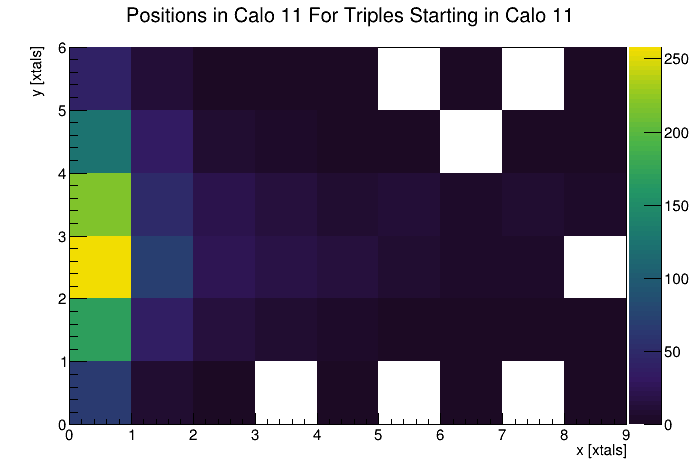

In [45]:
c = r.TCanvas()
positionsByCalo[10][0].Draw("colz")
c.Draw()

In [42]:
print(allPositionHists)

[<ROOT.TH2D object ("h_24_0") at 0x7fffd9014d10>, <ROOT.TH2D object ("h_24_1") at 0x7fffd90153f0>, <ROOT.TH2D object ("h_24_2") at 0x7fffd9015ad0>]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


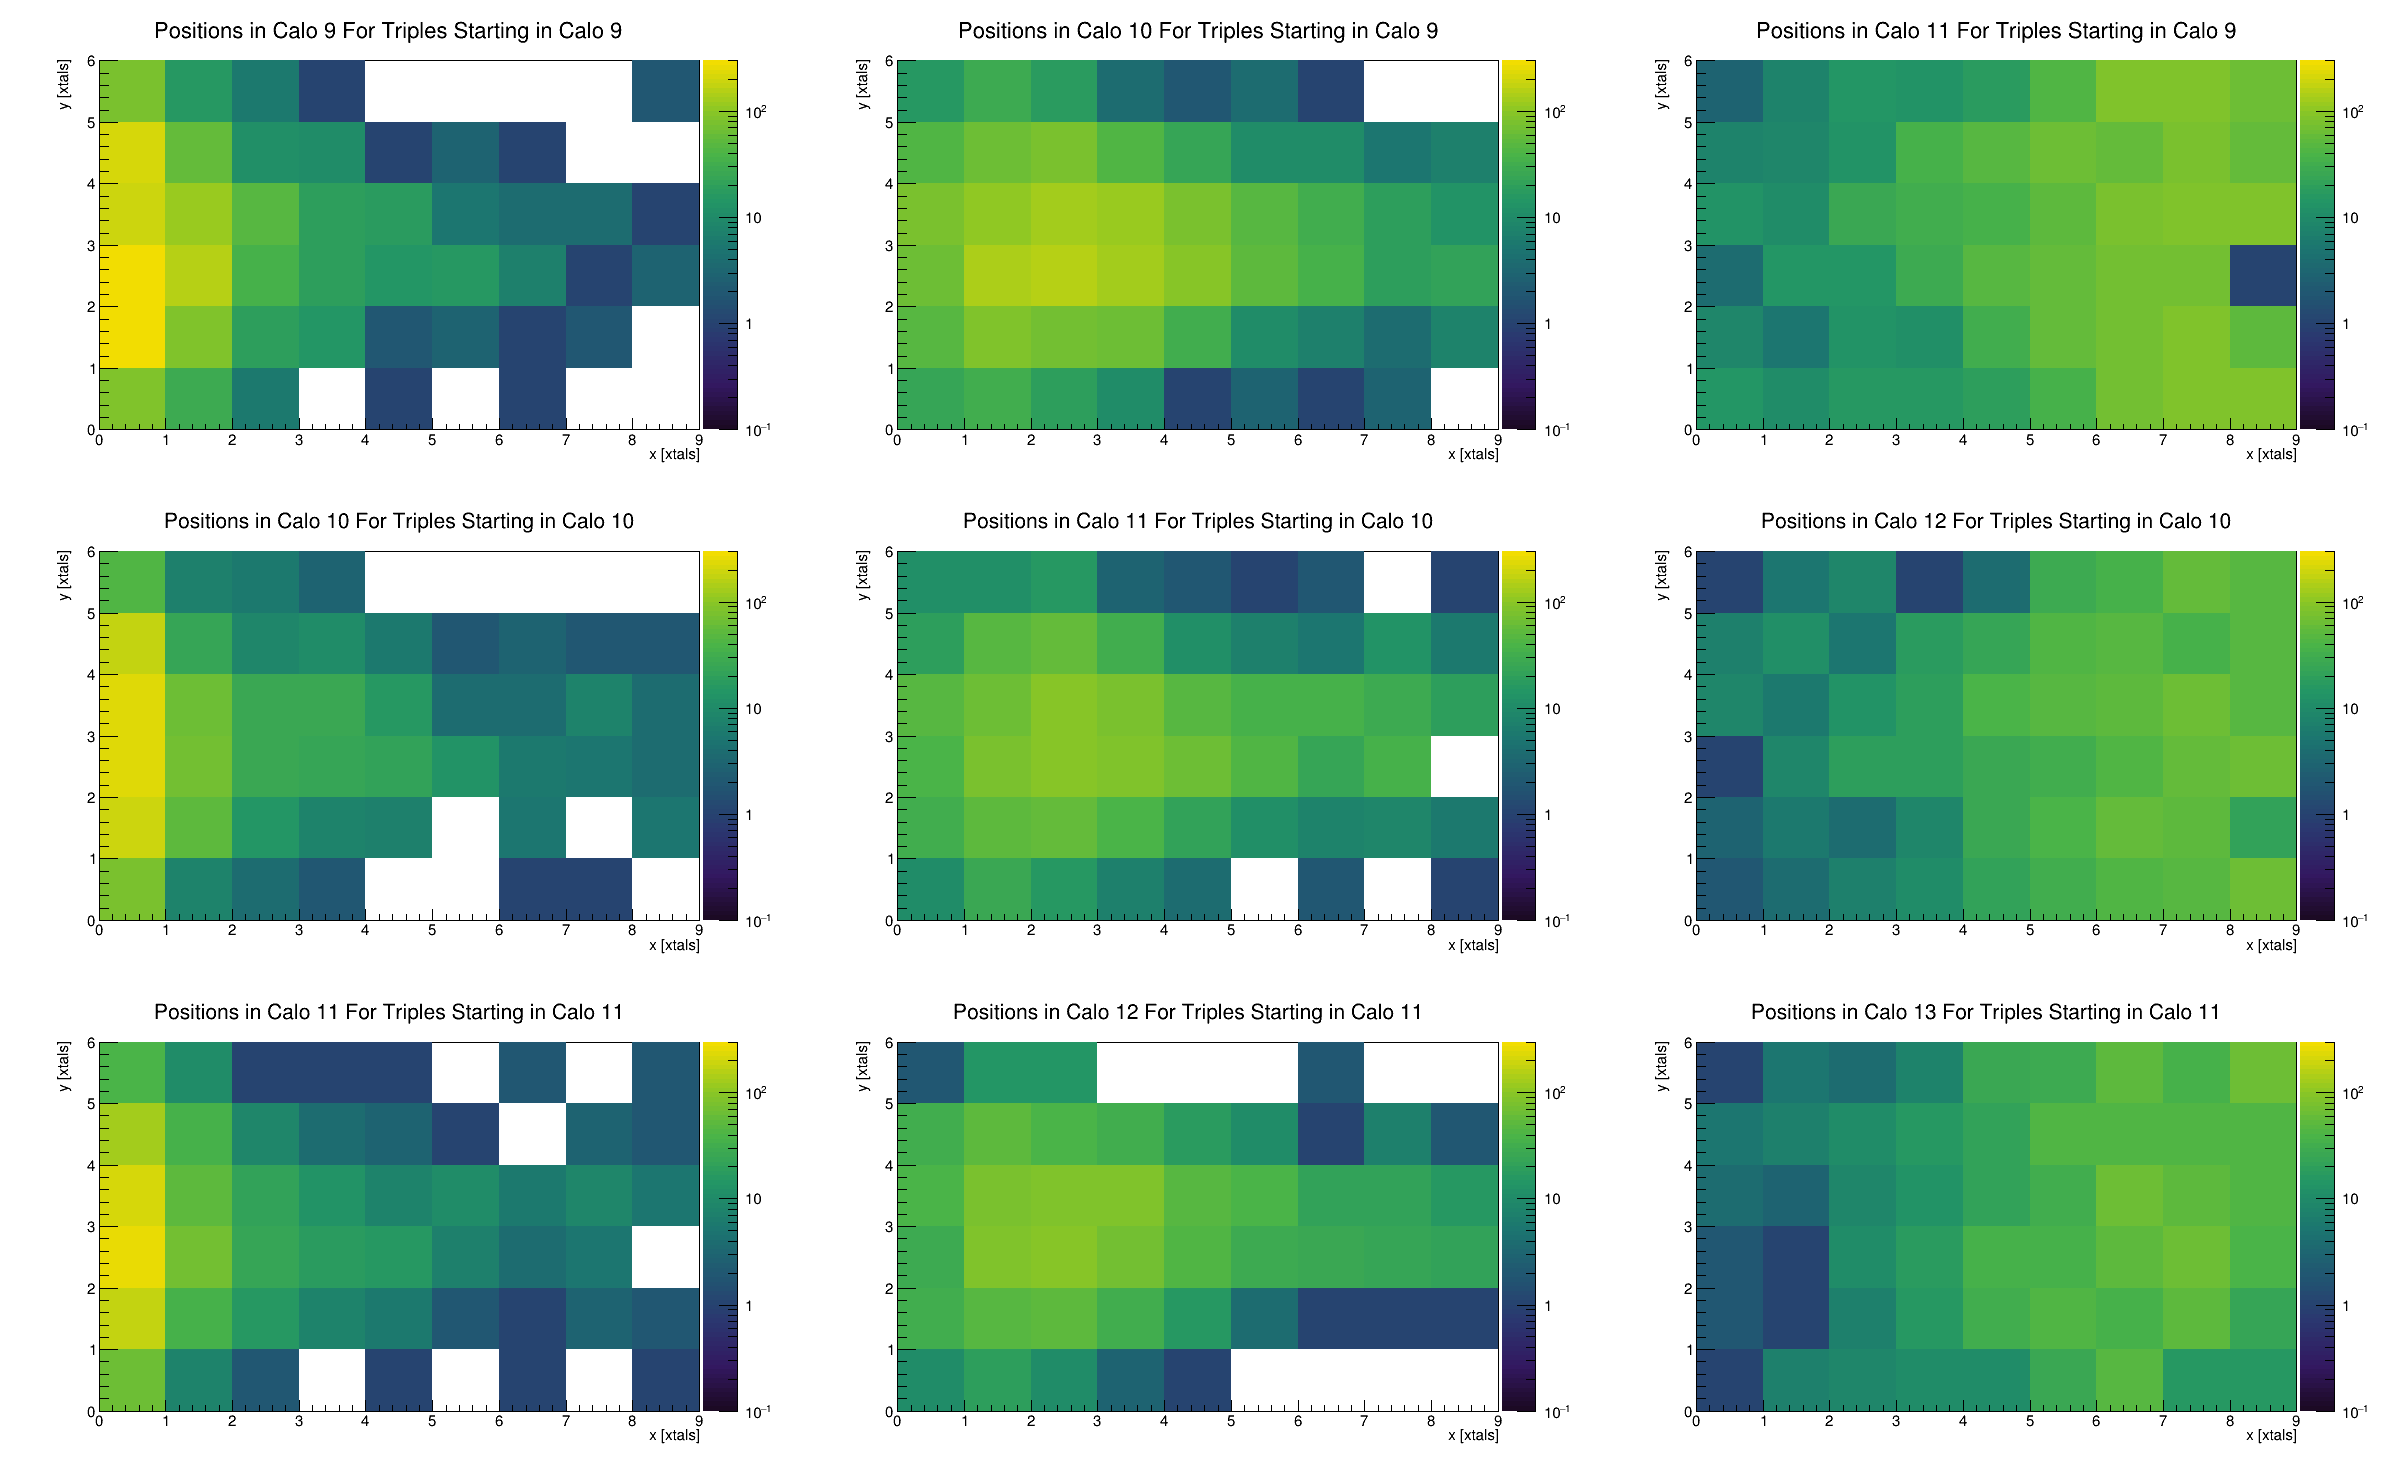

In [73]:
c = r.TCanvas("c","c",2400,1500)
c.Divide(3,3)
firstCalo = 9
for caloOffset in range(3):
    caloi = firstCalo+caloOffset
    for i in range(clevel):
        #r.gPad.SetRightMargin(0.12)

        c.cd(caloOffset*3+i+1)
        #print(caloOffset*3+i+1, caloi, i)
        positionsByCalo[caloi - 1][i].GetZaxis().SetRangeUser(0.1,300)
        positionsByCalo[caloi - 1][i].Draw("colz")
        r.gPad.SetLogz()
c.Draw()

---

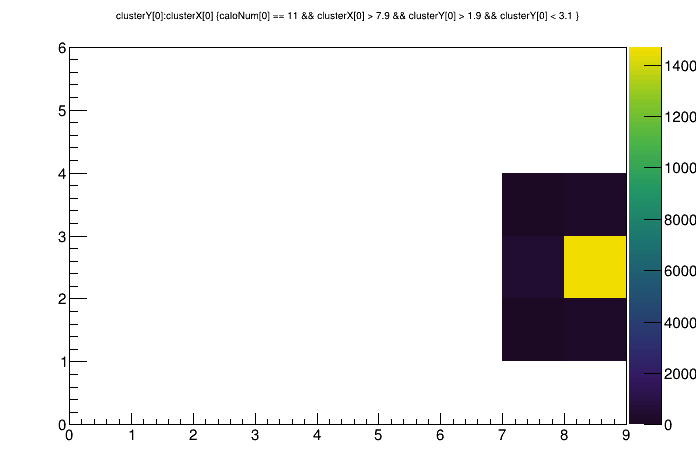

In [46]:
c = r.TCanvas()
firstCalo = 11
i=0
t.Draw("clusterY["+str(i)+"]:clusterX["+str(i)+"]>>hist(9,0,9,6,0,6)",
      "caloNum[0] == "+str(firstCalo)+" && clusterX[0] > 7.9 && clusterY[0] > 1.9 && clusterY[0] < 3.1 ",
       "colz")
c.Draw()

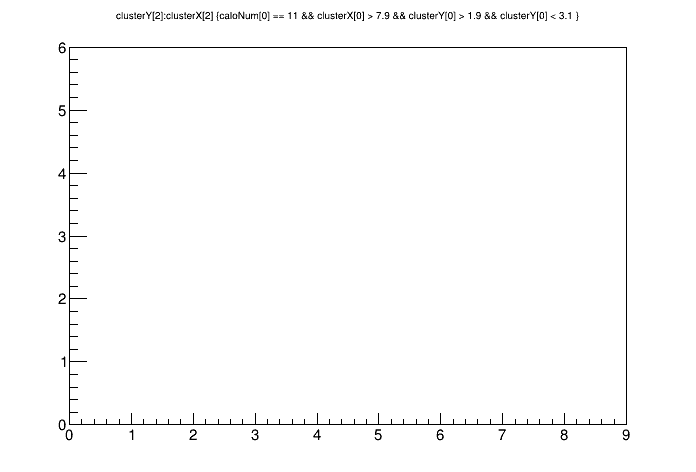

In [38]:
c = r.TCanvas()
firstCalo = 11
i=2
t.Draw("clusterY["+str(i)+"]:clusterX["+str(i)+"]>>hist(9,0,9,6,0,6)",
      "caloNum[0] == "+str(firstCalo)+" && clusterX[0] > 7.9 && clusterY[0] > 1.9 && clusterY[0] < 3.1 ",
       "colz")
c.Draw()

---

In [ ]:
c = r.TCanvas()
t.Draw("caloNum[0]",
      "caloNum[0] == "+str(firstCalo)+" && clusterX[0] > 7.9 && clusterY[0] > 1.9 && clusterY[0] < 3.1 ")

Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).


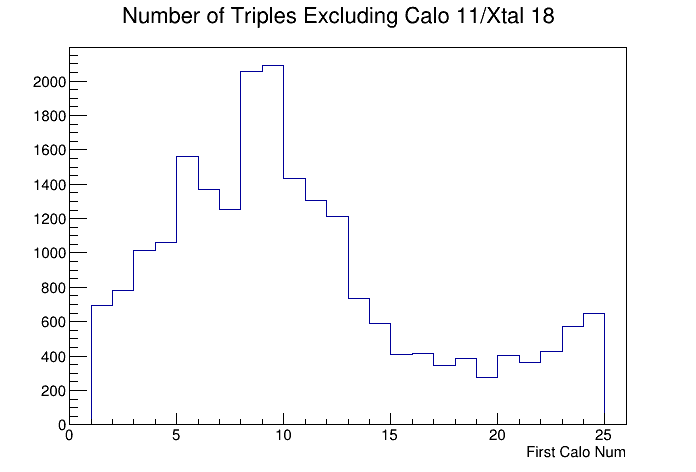

In [35]:
c = r.TCanvas()
h = r.TH1D("h","Number of Triples Excluding Calo 11/Xtal 18; First Calo Num",26,0,26)
t.Draw("caloNum[0]>>h",
      "!(caloNum[0] == 11 && clusterX[0] > 7.9 && clusterY[0] > 1.9 && clusterY[0] < 3.1) && !(caloNum[1] == 11 && clusterX[1] > 7.9 && clusterY[1] > 1.9 && clusterY[1] < 3.1) && !(caloNum[2] == 11 && clusterX[2] > 7.9 && clusterY[2] > 1.9 && clusterY[2] < 3.1) && coincidenceLevel == 3",
       "goff")
h.Draw()
c.Draw()

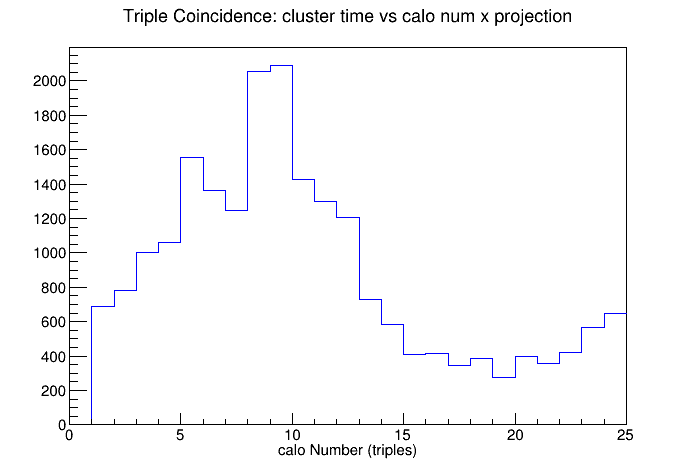

In [71]:
c = r.TCanvas()
htrip = f.Get("CoincidenceFinderLM/clusterTimecaloNumtriple_").Clone("htrip")
htrip.Project3D("x").Draw()
#c.SetLogy()
c.Draw()